# Fuzzy Associative Memory (FAM) - Contoh Implementasi
Notebook ini menunjukkan bagaimana membangun sistem kontrol sederhana menggunakan logika fuzzy dan FAM.

**Kasus**: Mengontrol kecepatan kipas berdasarkan suhu dan kelembaban.

In [1]:
# Import pustaka
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 1. Definisikan variabel input dan output

In [2]:
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

## 2. Definisikan fungsi keanggotaan

In [3]:
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['normal'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

## 3. Visualisasi fungsi keanggotaan

/opt/homebrew/Caskroom/miniforge/base/envs/analytics/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


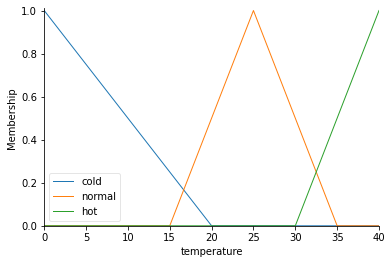

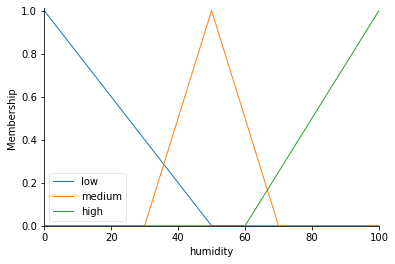

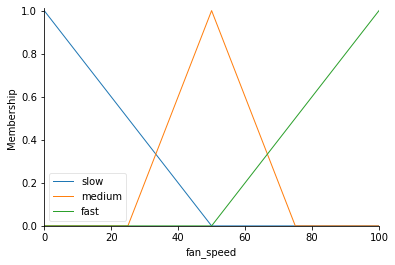

In [4]:
temperature.view()
humidity.view()
fan_speed.view()

## 4. Definisikan aturan fuzzy berdasarkan tabel FAM

In [5]:
rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_speed['slow'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['medium'], fan_speed['slow'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['high'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['normal'] & humidity['low'], fan_speed['slow'])
rule5 = ctrl.Rule(temperature['normal'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['normal'] & humidity['high'], fan_speed['fast'])
rule7 = ctrl.Rule(temperature['hot'] & humidity['low'], fan_speed['medium'])
rule8 = ctrl.Rule(temperature['hot'] & humidity['medium'], fan_speed['fast'])
rule9 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['fast'])

## 5. Bangun sistem kontrol dan lakukan simulasi

Kecepatan Kipas: 77.97619047619047


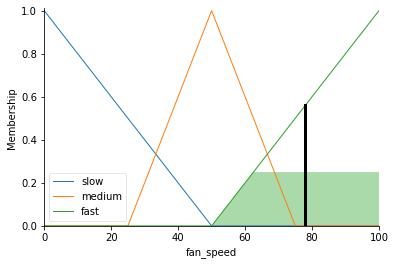

In [6]:
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

# Input nilai suhu dan kelembaban
fan_sim.input['temperature'] = 27
fan_sim.input['humidity'] = 70

# Hitung hasilnya
fan_sim.compute()
print("Kecepatan Kipas:", fan_sim.output['fan_speed'])
fan_speed.view(sim=fan_sim)